In [1]:
import pandas as pd
import numpy as np

from pandas import datetime
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot


import os
import cx_Oracle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
"""connection = cx_Oracle.connect('invctrl/mm@SHDATA')"""

"connection = cx_Oracle.connect('invctrl/mm@SHDATA')"

In [3]:
def parser(x):
	return datetime.strptime(x, '%m/%d/%Y')

In [4]:
df = pd.read_csv('data/item_history.csv',header=0, parse_dates=[5], index_col=[5] )
"""df.set_index('PERIOD_START')"""
df["REPLACEMENT_ITEM"].fillna('N', inplace=True)
df["QTY"]= round(df["QTY"]/df["QTY_PER_SELL_UOM"],4)
"""df['PERIOD_START'] = pd.to_datetime(df['PERIOD_START']).apply(lambda x: x.date())"""
df = df.drop(['QTY_PER_SELL_UOM', 'E3_YEAR', 'E3_4WK_PERIOD'], axis=1)


In [5]:
df

,DIST_NO,ITEM_NO,QTY,HITS,REPLACEMENT_ITEM
PERIOD_START,,,,,
2015-12-20,3,1015241,15456.0,5473,Y
2016-01-17,3,1015241,16883.0,5958,Y
2016-02-14,3,1015241,18714.0,6618,Y
2016-03-13,3,1015241,21455.0,7583,Y
2016-04-10,3,1015241,21451.0,7552,Y
2016-05-08,3,1015241,23593.0,8340,Y
2016-06-05,3,1015241,23658.0,8274,N
2016-07-03,3,1015241,23292.0,8145,N
2016-07-31,3,1015241,25056.0,8873,N


In [6]:
dfs = df.drop(['DIST_NO', 'ITEM_NO', 'HITS', 'REPLACEMENT_ITEM'], axis=1)
dfs



,QTY
PERIOD_START,
2015-12-20,15456.0
2016-01-17,16883.0
2016-02-14,18714.0
2016-03-13,21455.0
2016-04-10,21451.0
2016-05-08,23593.0
2016-06-05,23658.0
2016-07-03,23292.0
2016-07-31,25056.0


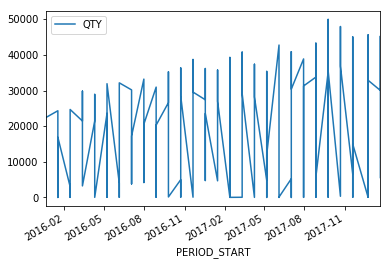

In [7]:
dfs.plot()

pyplot.show()

In [8]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 159 entries, 2015-12-20 to 2018-01-21
Data columns (total 1 columns):
QTY    159 non-null float64
dtypes: float64(1)
memory usage: 2.5 KB


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """Entry point for launching an IPython kernel.


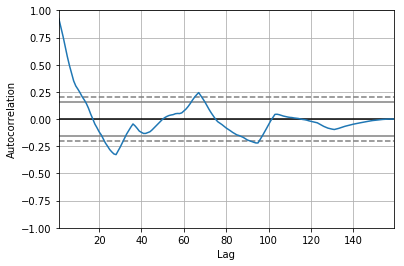

In [9]:
autocorrelation_plot(dfs)
pyplot.show()

                             ARIMA Model Results                              
Dep. Variable:                  D.QTY   No. Observations:                  158
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1592.146
Method:                       css-mle   S.D. of innovations           5754.851
Date:                Thu, 15 Feb 2018   AIC                           3198.291
Time:                        16:27:21   BIC                           3219.729
Sample:                    01-17-2016   HQIC                          3206.997
                         - 01-21-2018                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -63.7716    476.816     -0.134      0.894    -998.314     870.771
ar.L1.D.QTY     0.0327      0.079      0.413      0.680      -0.122       0.188
ar.L2.D.QTY     0.0210      0.079      0.266    

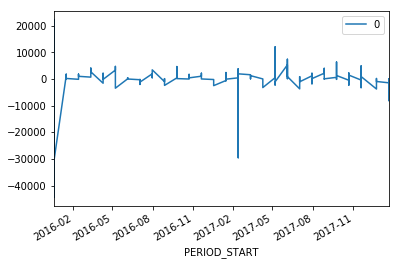

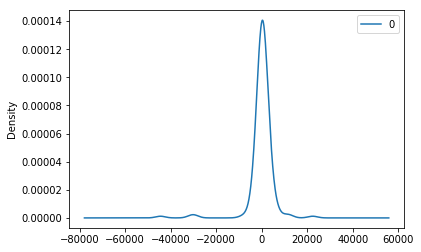

                  0
count    158.000000
mean       1.051696
std     5773.231516
min   -44459.660727
25%     -363.393182
50%      113.122782
75%     1416.398451
max    22382.286263


In [10]:
model = ARIMA(dfs, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

predicted=11482.343881, expected=13308.000000
predicted=13384.384890, expected=14747.000000
predicted=15468.835194, expected=16007.000000
predicted=16744.757264, expected=15542.000000
predicted=14521.260628, expected=18058.000000
predicted=18098.485930, expected=18493.000000
predicted=18440.183104, expected=17231.000000
predicted=17213.894118, expected=20562.000000
predicted=20903.184938, expected=20307.000000
predicted=20054.746304, expected=22195.000000
predicted=22422.473535, expected=23085.000000
predicted=23450.570129, expected=24571.000000
predicted=24489.363332, expected=23568.000000
predicted=23783.924032, expected=26044.000000
predicted=26155.749529, expected=27928.000000
predicted=28033.366389, expected=29162.000000
predicted=29295.980968, expected=27394.000000
predicted=27780.791861, expected=26485.000000
predicted=26452.146939, expected=31559.000000
predicted=31619.133824, expected=30402.000000
predicted=30239.300042, expected=31295.000000
predicted=31882.250924, expected=3

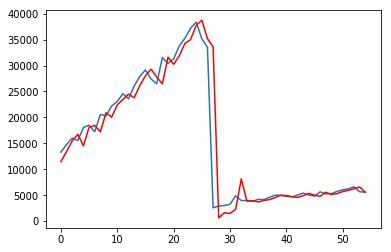

In [11]:
X = dfs.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()